### Contents

- [EDA](#EDA)

### Import Data

In [1]:
# user configuration

In [2]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# html
from IPython.display import Image
from IPython.core.display import HTML

# others
import datetime as dt
#import re
#import os

In [3]:
# file paths

input_path = '../data/1_input/'
clean_path = '../data/2_clean/'
preprocess_path = '../data/3_preprocess/'
output_path = '../data/4_output/'

folder = 'fitbit/'

In [4]:
# import clean data

df_activity = pd.read_csv(clean_path + folder + 'activity.csv')
df_weight = pd.read_csv(clean_path + folder + 'weight.csv')

df_sec = pd.read_csv(clean_path + folder + 'seconds.csv')
df_min = pd.read_csv(clean_path + folder + 'minutes.csv')
df_hr = pd.read_csv(clean_path + folder + 'hours.csv')

### Functions

### Dataframes Overview

In [5]:
cols = ['id','df_activity','df_weight','df_sec','df_min','df_hr']

df_id_summary = pd.DataFrame(columns=cols)

set_1 = set(df_activity['id'])
set_2 = set(df_weight['id'])
set_3 = set(df_sec['id'])
set_4 = set(df_min['id'])
set_5 = set(df_hr['id'])

df_id_summary['id'] = list(set_1)

df_id_summary['df_activity'] = True
df_id_summary['df_weight'] = False
df_id_summary['df_sec'] = False
df_id_summary['df_min'] = False
df_id_summary['df_hr'] = False

for idx,val in enumerate(df_id_summary['id']):    

    if val in set_2:
        df_id_summary.at[idx,'df_weight'] = True
    if val in set_3:
        df_id_summary.at[idx,'df_sec'] = True
    if val in set_4:
        df_id_summary.at[idx,'df_min'] = True
    if val in set_5:
        df_id_summary.at[idx,'df_hr'] = True
        
df_id_summary      

,id,df_activity,df_weight,df_sec,df_min,df_hr
0,1,True,True,False,True,True
1,2,True,False,False,True,True
2,3,True,False,False,True,True
3,4,True,False,False,True,True
4,5,True,True,False,True,True
5,6,True,False,True,True,True
6,7,True,False,True,True,True
7,8,True,False,False,True,True
8,9,True,True,True,True,True
9,10,True,True,False,True,True


### Explore df_activity

In [6]:
df_activity_2 = df_activity.drop(columns=['timestamp','dayweek','year','month','day'])

mask_steps = df_activity_2['steps'] >= 1000

print(len(df_activity_2))
df_activity_2 = df_activity_2[mask_steps]
print(len(df_activity_2))

457
370


In [7]:
df_activity_2.groupby(['id']).mean()

,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,12274.777778,1893.222222,8.012222,2.938333,0.670556,4.403333,0.000000,37.833333,16.722222,240.388889,853.055556
2,4415.777778,1357.833333,2.866667,0.054444,0.028889,2.777778,0.005556,0.777778,0.611111,125.166667,1271.944444
3,9274.800000,2916.400000,6.752000,1.134000,2.030000,3.580000,0.008000,14.800000,43.500000,227.700000,1034.200000
4,5460.000000,1868.625000,3.608750,0.076250,0.046250,3.486250,0.000000,1.125000,1.125000,237.625000,1056.250000
5,2762.111111,2432.000000,1.913333,0.000000,0.082222,1.831111,0.000000,0.000000,2.222222,140.000000,941.222222
6,12174.916667,2475.333333,8.775833,3.085833,0.884167,4.805833,0.000000,40.083333,22.500000,253.833333,1058.916667
7,3392.750000,1355.500000,2.103333,0.000000,0.000000,2.103333,0.000000,0.000000,0.000000,169.333333,659.166667
8,4707.625000,1636.125000,3.183750,0.118750,0.067500,2.997500,0.000000,1.375000,1.625000,188.875000,1153.875000
9,10500.071429,2137.214286,6.974286,0.922857,1.350714,4.700714,0.000000,12.642857,24.785714,271.642857,702.357143


In [8]:
df_activity_2.groupby(['id']).min()

,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,10016,1755,6.37,0.91,0.16,2.48,0.0,15,5,168,588
2,1004,706,0.65,0.00,0.00,0.65,0.0,0,0,54,604
3,1329,489,0.97,0.00,0.00,0.97,0.0,0,0,35,207
4,2841,1636,1.88,0.00,0.00,1.88,0.0,0,0,136,620
5,1209,2202,0.84,0.00,0.00,0.84,0.0,0,0,73,805
6,5477,1140,3.84,0.00,0.00,1.27,0.0,0,0,67,551
7,1019,600,0.63,0.00,0.00,0.63,0.0,0,0,64,223
8,1846,790,1.24,0.00,0.00,1.24,0.0,0,0,69,617
9,6760,1929,4.47,0.00,0.00,3.27,0.0,0,0,196,463


In [9]:
df_activity_2.groupby(['id']).quantile(q=0.25) 

0.25,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,10993.50,1825.75,7.1675,2.1925,0.4900,3.7825,0.00,28.50,12.25,213.00,736.25
2,1585.75,1309.25,1.0375,0.0000,0.0000,1.0300,0.00,0.00,0.00,85.00,1271.75
3,5437.50,2925.75,3.9825,0.2350,0.7725,2.4875,0.00,3.25,16.00,143.00,959.00
4,5231.75,1819.75,3.4550,0.0000,0.0000,3.4550,0.00,0.00,0.00,211.75,1038.00
5,2105.00,2344.00,1.4600,0.0000,0.0000,1.3800,0.00,0.00,0.00,108.00,842.00
6,10080.75,2442.25,7.0825,1.0875,0.5375,4.3425,0.00,33.25,15.00,236.00,1075.00
7,2530.75,1376.50,1.5725,0.0000,0.0000,1.5725,0.00,0.00,0.00,151.75,651.50
8,2232.25,1524.50,1.5000,0.0000,0.0000,1.5000,0.00,0.00,0.00,100.50,1099.50
9,10020.25,2036.50,6.6500,0.1600,0.3825,3.5450,0.00,2.00,6.75,216.75,613.50


In [10]:
df_activity_2.groupby(['id']).median()

,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,12148.5,1875.5,7.805,2.765,0.645,4.370,0.00,34.5,16.0,233.5,783.5
2,2447.5,1360.0,1.590,0.000,0.000,1.545,0.00,0.0,0.0,116.5,1318.5
3,8983.5,3150.0,6.540,0.410,1.820,3.300,0.00,6.0,38.0,205.5,1149.0
4,5398.5,1888.5,3.570,0.000,0.000,3.550,0.00,0.0,0.0,251.0,1160.5
5,2352.0,2442.0,1.630,0.000,0.000,1.550,0.00,0.0,0.0,134.0,858.0
6,12083.5,2579.0,8.540,3.230,0.760,5.235,0.00,41.0,17.5,265.0,1092.5
7,3139.0,1410.0,1.945,0.000,0.000,1.945,0.00,0.0,0.0,171.5,697.0
8,4140.0,1666.5,2.790,0.000,0.000,2.550,0.00,0.0,0.0,164.0,1242.5
9,10231.5,2097.5,6.805,0.790,1.230,4.575,0.00,13.0,28.5,262.0,698.0


In [11]:
df_activity_2.groupby(['id']).quantile(q=0.75) 

0.75,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,12682.25,1922.75,8.4225,3.3175,0.7900,4.9425,0.0000,43.75,20.00,263.00,1026.50
2,5884.50,1464.75,3.8100,0.0000,0.0000,3.6475,0.0100,0.00,0.00,153.75,1355.00
3,12475.50,3314.75,9.0950,1.3050,2.4100,5.2775,0.0100,18.00,54.25,269.75,1217.00
4,6397.00,1966.00,4.2250,0.0000,0.0000,3.7400,0.0000,0.00,0.00,269.75,1180.00
5,3198.00,2449.00,2.2100,0.0000,0.0000,2.2100,0.0000,0.00,0.00,146.00,938.00
6,15332.75,2733.50,10.9475,5.1300,1.1100,5.7850,0.0000,50.75,26.50,296.50,1117.00
7,4107.00,1447.50,2.5450,0.0000,0.0000,2.5450,0.0000,0.00,0.00,196.25,722.25
8,5448.00,1816.50,3.6700,0.0150,0.0300,3.6700,0.0000,0.25,0.50,236.00,1299.50
9,10479.75,2181.25,7.0375,1.3775,2.0450,5.5050,0.0000,17.50,34.50,315.75,780.75


In [12]:
df_activity_2.groupby(['id']).max()

,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede
id,,,,,,,,,,,
1,17609,2154,11.56,6.92,1.28,6.04,0.00,89,30,341,1208
2,18464,1574,12.00,0.51,0.27,12.00,0.03,7,7,270,1386
3,20237,4029,14.71,4.83,6.40,5.73,0.03,59,141,586,1345
4,6847,1971,4.53,0.61,0.37,4.33,0.00,9,9,305,1219
5,5662,2783,3.92,0.00,0.37,3.92,0.00,0,11,267,1250
6,18247,3021,13.83,7.11,2.21,6.37,0.00,72,62,339,1203
7,6679,1583,4.14,0.00,0.00,4.14,0.00,0,0,263,795
8,11230,2206,7.67,0.89,0.42,6.66,0.00,10,11,390,1347
9,16081,2488,10.63,3.59,3.12,7.56,0.00,51,58,401,1002


In [13]:
df_activity_2['mins_total'] = df_activity_2['mins_act_high'] + df_activity_2['mins_act_med'] + df_activity_2['mins_act_low'] + df_activity_2['mins_act_sede']

df_activity_2['mins_pct_high'] = df_activity_2['mins_act_high'] / df_activity_2['mins_total']
df_activity_2['mins_pct_med'] = df_activity_2['mins_act_med'] / df_activity_2['mins_total']
df_activity_2['mins_pct_low'] = df_activity_2['mins_act_low'] / df_activity_2['mins_total']
df_activity_2['mins_pct_sede'] = df_activity_2['mins_act_sede'] / df_activity_2['mins_total']

In [14]:
df_activity_2.head()

,id,steps,calories,dist_total,dist_act_high,dist_act_med,dist_act_low,dist_act_sede,mins_act_high,mins_act_med,mins_act_low,mins_act_sede,mins_total,mins_pct_high,mins_pct_med,mins_pct_low,mins_pct_sede
0,1,11004,1819,7.10,2.57,0.46,4.07,0.0,33,12,205,804,1054,0.031309,0.011385,0.194497,0.762808
1,1,17609,2154,11.56,6.92,0.73,3.91,0.0,89,17,274,588,968,0.091942,0.017562,0.283058,0.607438
2,1,12736,1944,8.53,4.66,0.16,3.71,0.0,56,5,268,605,934,0.059957,0.005353,0.286938,0.647752
3,1,13231,1932,8.93,3.19,0.79,4.95,0.0,39,20,224,1080,1363,0.028613,0.014674,0.164343,0.792370
4,1,12041,1886,7.86,2.16,1.09,4.61,0.0,28,28,243,763,1062,0.026365,0.026365,0.228814,0.718456


In [15]:
cols = ['mins_pct_high','mins_pct_med','mins_pct_low','mins_pct_sede']

df_activity_3 = df_activity_2.groupby(['id'])[cols].mean()
df_activity_3.reset_index(inplace=True)
df_activity_3.head()

,id,mins_pct_high,mins_pct_med,mins_pct_low,mins_pct_sede
0,1,0.034530,0.014751,0.215950,0.734768
1,2,0.000540,0.000424,0.090622,0.908413
2,3,0.010278,0.030208,0.170157,0.789357
3,4,0.000781,0.000781,0.187164,0.811274
4,5,0.000000,0.001874,0.129322,0.868804


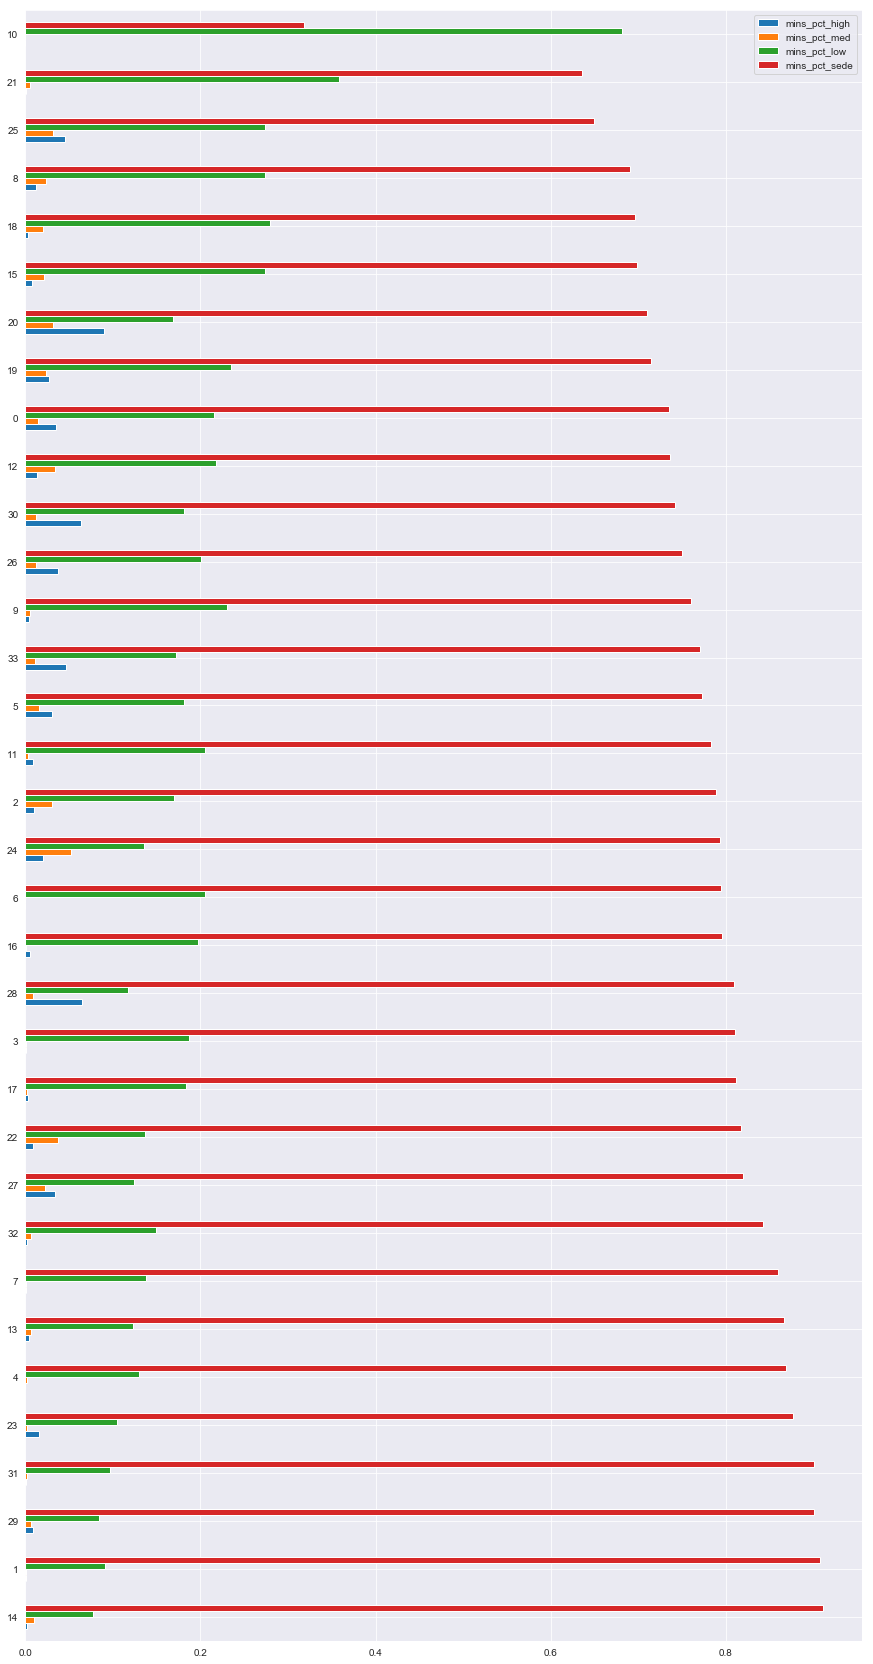

In [16]:
#plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
#plt.title('Steps by Hours for Id 1 In A Day (High Steps Count)')

#cols = ['mins_pct_high','mins_pct_med','mins_pct_low']

df_activity_3[cols].sort_values(by='mins_pct_sede',ascending=False).plot(kind='barh',figsize=(15,30))

### Explore df_weight

In [17]:
# bmi < 18.5: underweight
# 18.5 <= bmi < 25: normal weight
# 25.0 <= bmi < 30: overweight
# bmi >= 30.0: obese

cols = ['height',18.5,25.0,30.0]
df_bmi = pd.DataFrame(columns=cols)

df_bmi['height'] = range(150,201,1)

In [18]:
# bmi = weight / height^2
# weight = bmi * height^2
df_bmi[cols[1]] = cols[1] * (df_bmi[cols[0]]/100)**2
df_bmi[cols[2]] = cols[2] * (df_bmi[cols[0]]/100)**2
df_bmi[cols[3]] = cols[3] * (df_bmi[cols[0]]/100)**2

df_bmi.reset_index(inplace=True)
#df_bmi

In [19]:
cols = ['height','weight','bmi']
df_weight_id = df_weight.groupby('id')[cols].mean()

df_weight_id.sort_values(by='bmi',ascending=False,inplace=True)
df_weight_id.reset_index(inplace=True)
df_weight_id

,id,height,weight,bmi
0,5,168.0,129.600000,46.170000
1,18,162.0,92.400000,35.010000
2,31,160.0,75.600000,29.550000
3,19,160.0,69.400000,27.140000
4,20,195.0,99.700000,26.110000
5,35,183.0,85.755556,25.677778
6,11,188.0,88.400000,25.030000
7,9,160.0,63.400000,24.770000
8,27,160.0,61.864286,24.155000
9,1,152.0,53.300000,22.970000


BMI Range: Num of People
Obese Weight: 2
Over Weight: 5
Normal Weight: 4
Under Weight: 0


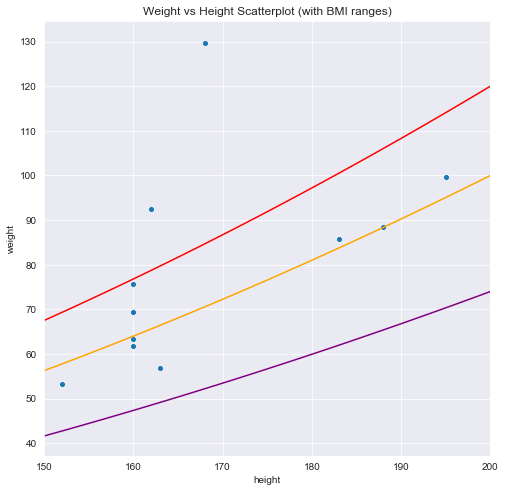

In [20]:
plt.figure(figsize=(8,8))
plt.xlim(150,200)
plt.yticks(range(40,141,10))
plt.title('Weight vs Height Scatterplot (with BMI ranges)')

cols = ['height',18.5,25.0,30.0]

sns.lineplot(data=df_bmi,x='height',y=cols[3],color='red')
sns.lineplot(data=df_bmi,x='height',y=cols[2],color='orange')
sns.lineplot(data=df_bmi,x='height',y=cols[1],color='purple')

sns.scatterplot(data=df_weight_id,x='height',y='weight')

print('BMI Range: Num of People')
print('Obese Weight: 2')
print('Over Weight: 5')
print('Normal Weight: 4')
print('Under Weight: 0')

### Explore df_sec

In [21]:
print(df_sec.shape)
df_sec.head()

(1154681, 10)


,id,timestamp,dayweek,year,month,day,hour,min,sec,hr
0,6,2016-04-01 07:54:00,Friday,2016,4,1,7,54,0,93
1,6,2016-04-01 07:54:05,Friday,2016,4,1,7,54,5,91
2,6,2016-04-01 07:54:10,Friday,2016,4,1,7,54,10,96
3,6,2016-04-01 07:54:15,Friday,2016,4,1,7,54,15,98
4,6,2016-04-01 07:54:20,Friday,2016,4,1,7,54,20,100


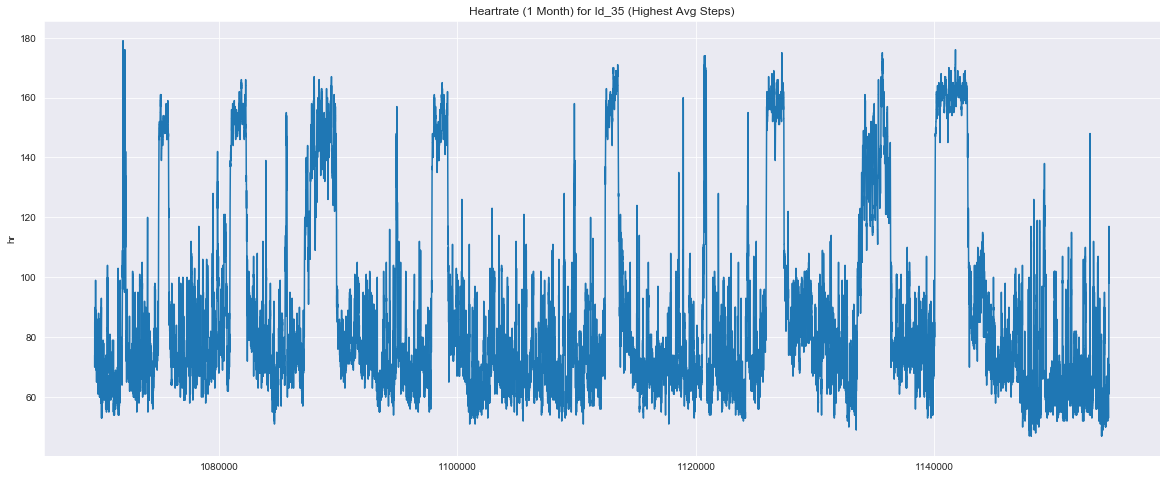

In [22]:
mask_id = df_sec['id'] == 35
df_sec_id = df_sec[mask_id]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Heartrate (1 Month) for Id_35 (Highest Avg Steps)')

sns.lineplot(data=df_sec_id,x=df_sec_id.index,y='hr')

print('')

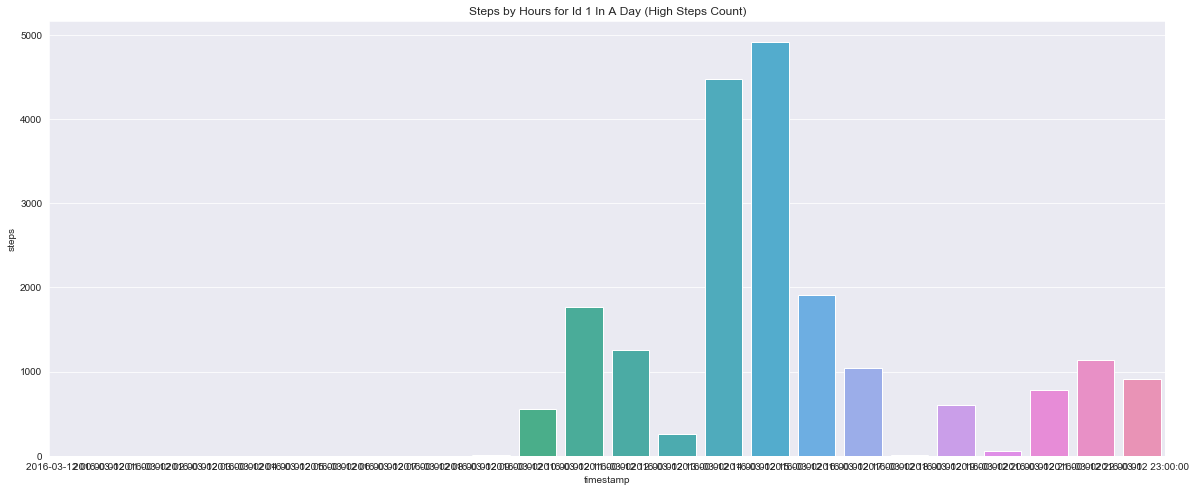

In [23]:
mask_id = df_hr['id'] == 1
mask_dt = df_hr['timestamp'].str.find('2016-03-12') == 0
mask_dt

df_hr_id = df_hr[mask_id & mask_dt]  

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 1 In A Day (High Steps Count)')

sns.barplot(data=df_hr_id,x='timestamp',y='steps')

### Explore df_min

In [24]:
print(df_min.shape)
df_min.head()

(1445040, 13)


,id,timestamp,dayweek,year,month,day,hour,min,sec,steps,calories,intensity,mets
0,1,2016-03-12 00:00:00,Saturday,2016,3,12,0,0,0,0,0.797,0,10
1,1,2016-03-12 00:01:00,Saturday,2016,3,12,0,1,0,0,0.797,0,10
2,1,2016-03-12 00:02:00,Saturday,2016,3,12,0,2,0,0,0.797,0,10
3,1,2016-03-12 00:03:00,Saturday,2016,3,12,0,3,0,0,0.797,0,10
4,1,2016-03-12 00:04:00,Saturday,2016,3,12,0,4,0,0,0.797,0,10


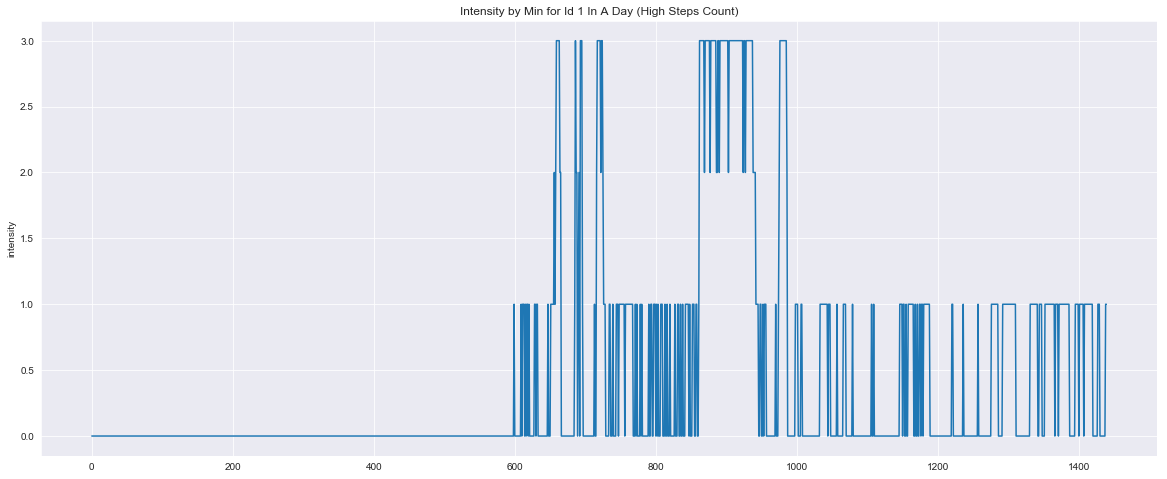

In [25]:
mask_id = df_min['id'] == 1
mask_dt = df_min['timestamp'].str.find('2016-03-12') == 0

df_min_id = df_min[mask_id & mask_dt]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Intensity by Min for Id 1 In A Day (High Steps Count)')

sns.lineplot(data=df_min_id,x=df_min_id.index,y='intensity')

### Explore df_hr

In [26]:
print(df_hr.shape)
df_hr.head()

(24084, 13)


,id,timestamp,dayweek,year,month,day,hour,min,sec,steps,calories,intensity_total,intensity_avg
0,1,2016-03-12 00:00:00,Saturday,2016,3,12,0,0,0,0,48,0,0.0
1,1,2016-03-12 01:00:00,Saturday,2016,3,12,1,0,0,0,48,0,0.0
2,1,2016-03-12 02:00:00,Saturday,2016,3,12,2,0,0,0,48,0,0.0
3,1,2016-03-12 03:00:00,Saturday,2016,3,12,3,0,0,0,48,0,0.0
4,1,2016-03-12 04:00:00,Saturday,2016,3,12,4,0,0,0,48,0,0.0


Seems that Id_10 is active throughout the day but does less aerobic exercises.


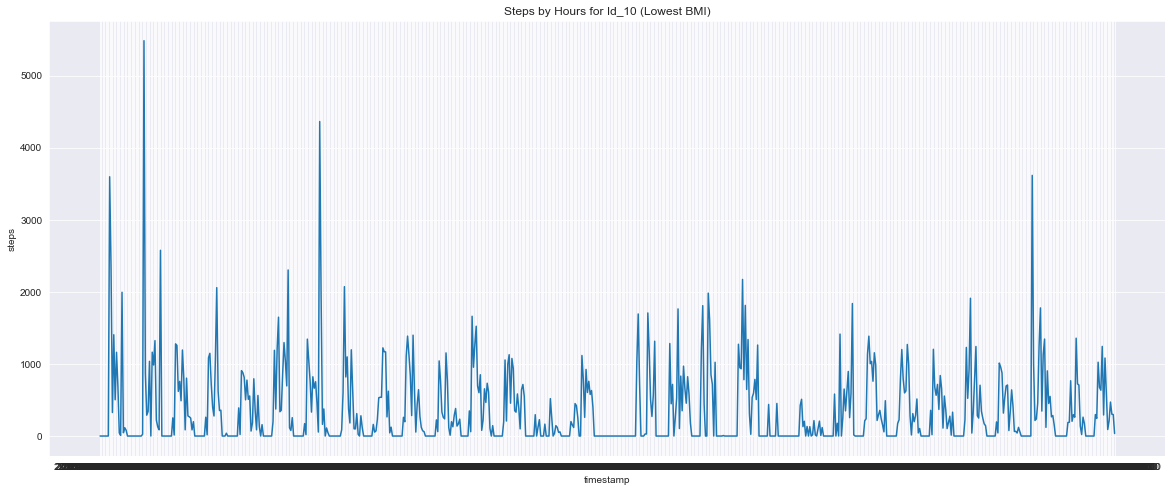

In [27]:
mask_id = df_hr['id'] == 10
df_hr_id = df_hr[mask_id]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id_10 (Lowest BMI)')

sns.lineplot(data=df_hr_id,x='timestamp',y='steps');

print('Seems that Id_10 is active throughout the day but does less aerobic exercises.')

Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).


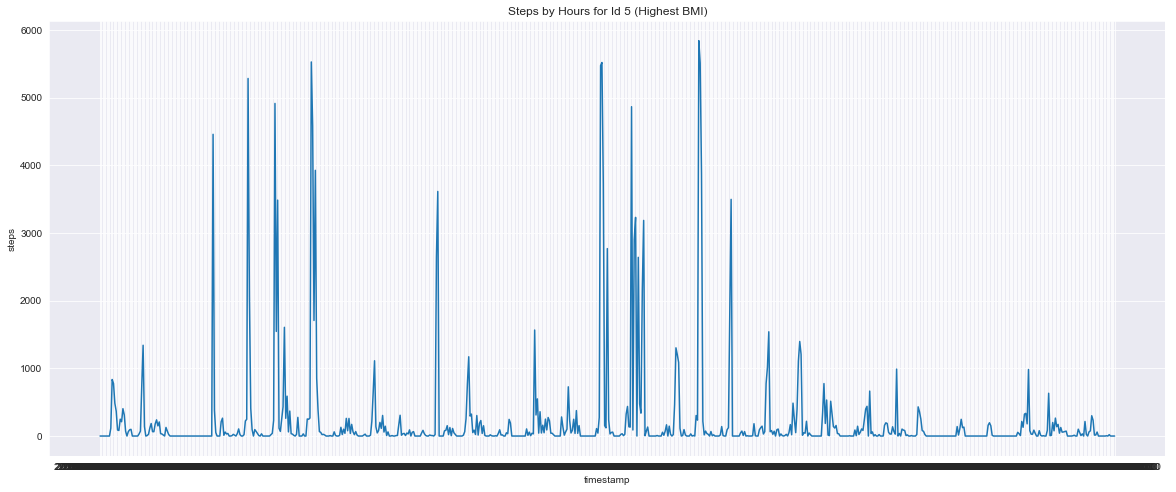

In [28]:
mask_id = df_hr['id'] == 5
df_hr_id = df_hr[mask_id]

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 5 (Highest BMI)')

sns.lineplot(data=df_hr_id,x='timestamp',y='steps')

print('Seems that Id_5 is a sedentary person for most time in a day but does more aeroic exercises (to lost weight?).')

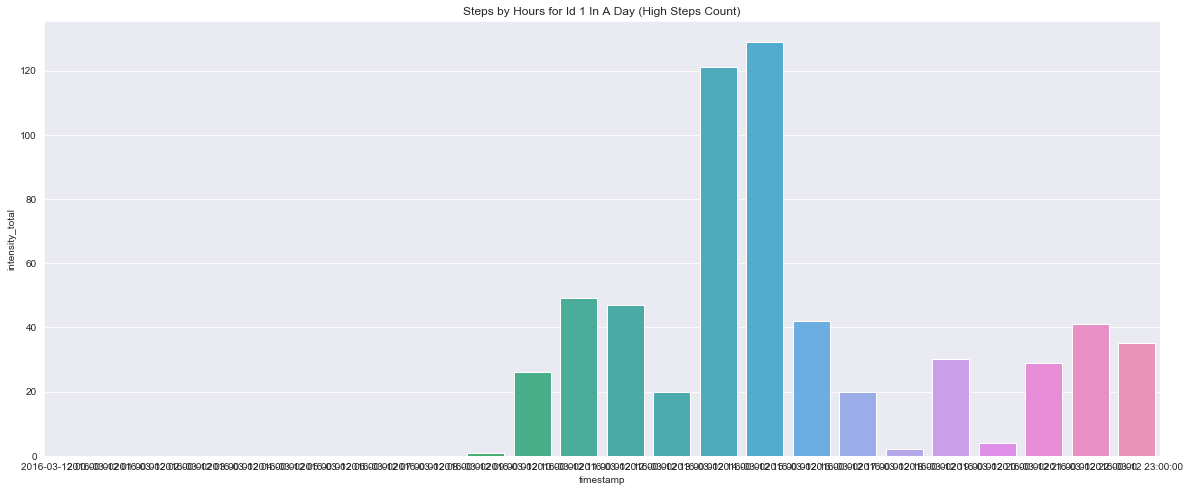

In [29]:
mask_id = df_hr['id'] == 1
mask_dt = df_hr['timestamp'].str.find('2016-03-12') == 0
mask_dt

df_hr_id = df_hr[mask_id & mask_dt] 

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 1 In A Day (High Steps Count)')

sns.barplot(data=df_hr_id,x='timestamp',y='intensity_total')

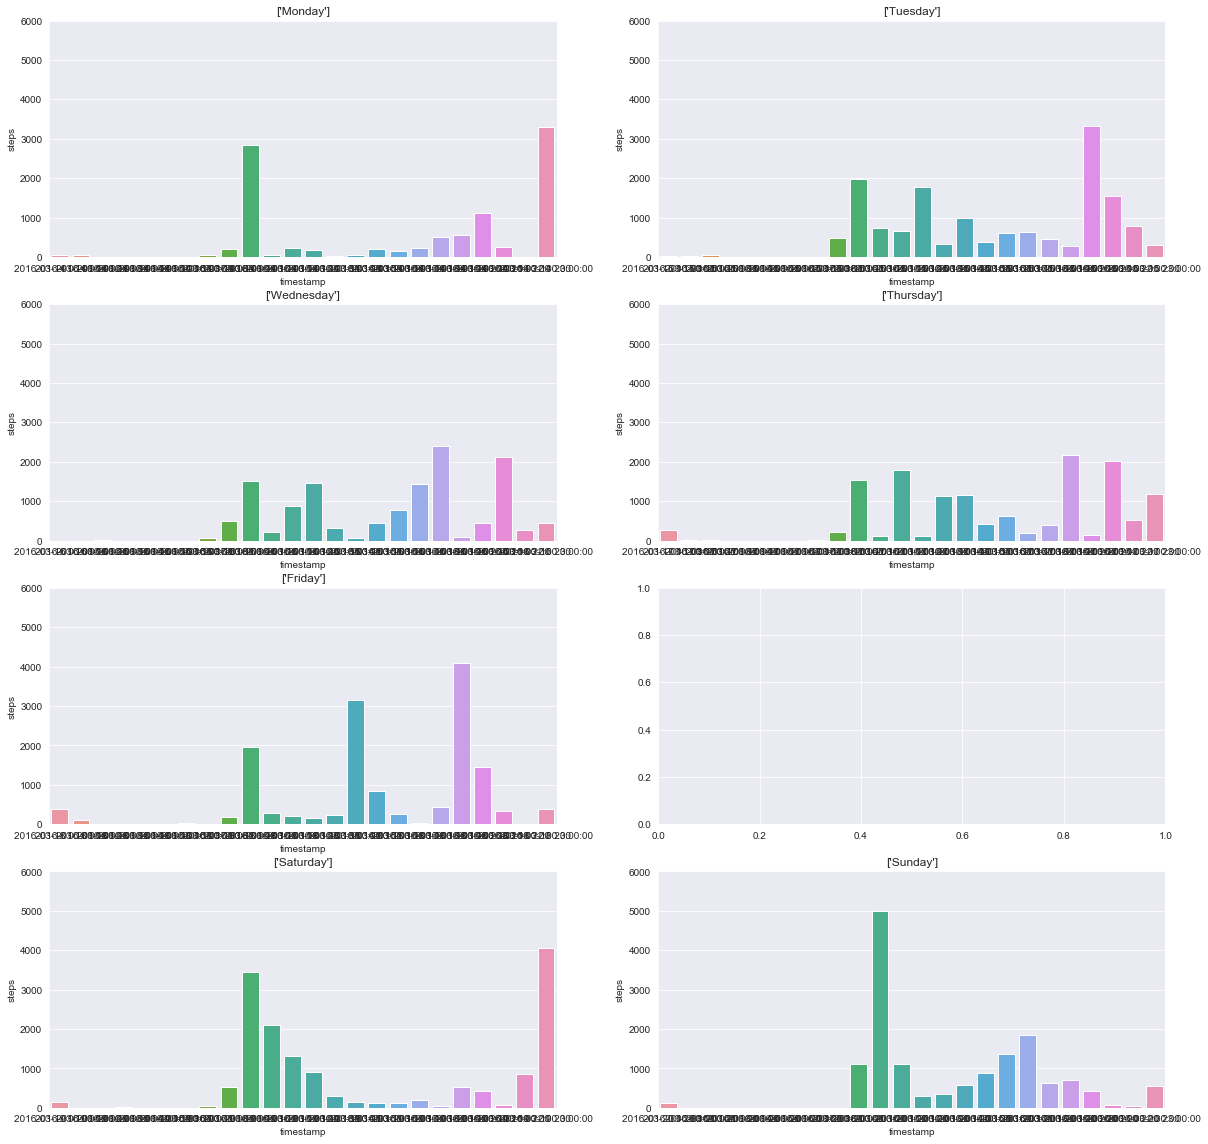

In [30]:
year = 2016
mth = 3
day = 14

mask_id = df_hr['id'] == 1
df_hr_id = df_hr[mask_id]

rows = 4
cols = 2
 
fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
ax = ax.ravel()

index = 0

for i in range(rows):
    for j in range(cols):
        
        if index == 5:
            index += 1
            continue
        
        mask_year = df_hr_id['year'] == year
        mask_mth = df_hr_id['month'] == mth
        mask_day = df_hr_id['day'] == day
        
        df_temp = df_hr_id[mask_year & mask_mth & mask_day]
        
        sns.barplot(data=df_temp,x='timestamp',y='steps',ax=ax[index])        
        
        dayweek = df_temp['dayweek'].unique()
        #print(dayweek)
        ax[index].set_title(dayweek)
        ax[index].set_ylim(0,6000)
        
        day += 1
        index += 1

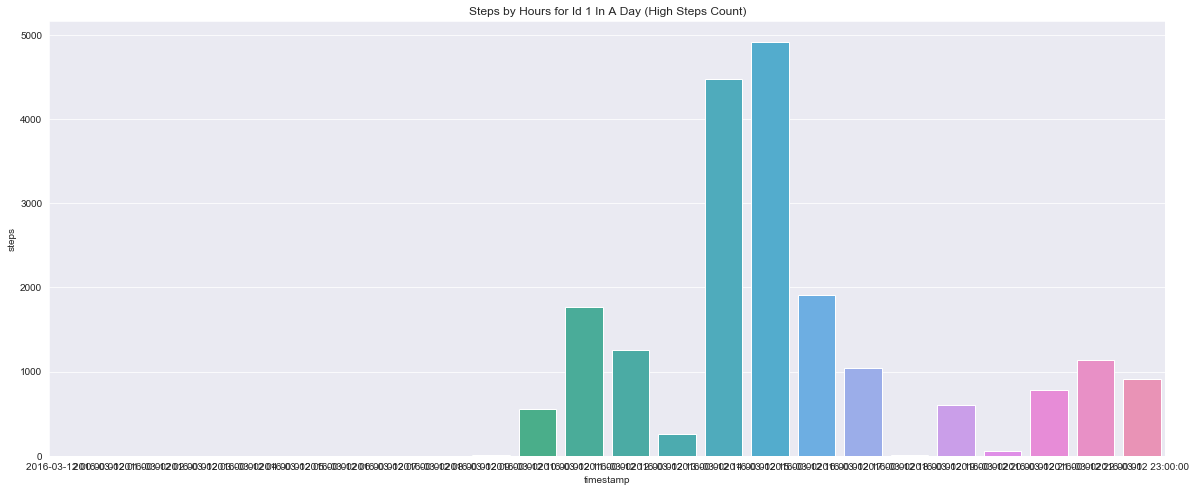

In [31]:
mask_id = df_hr['id'] == 1
mask_dt = df_hr['timestamp'].str.find('2016-03-12') == 0

df_hr_id = df_hr[mask_id & mask_dt]  

plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Steps by Hours for Id 1 In A Day (High Steps Count)')

sns.barplot(data=df_hr_id,x='timestamp',y='steps')

In [32]:
mask_id = df_hr['id'] == 18
df_hr_id = df_hr[mask_id]

# cols = ['intensity_total']
# df_hr_id = df_hr_id.groupby(['dayweek','hour'])[cols].mean()
# print('')

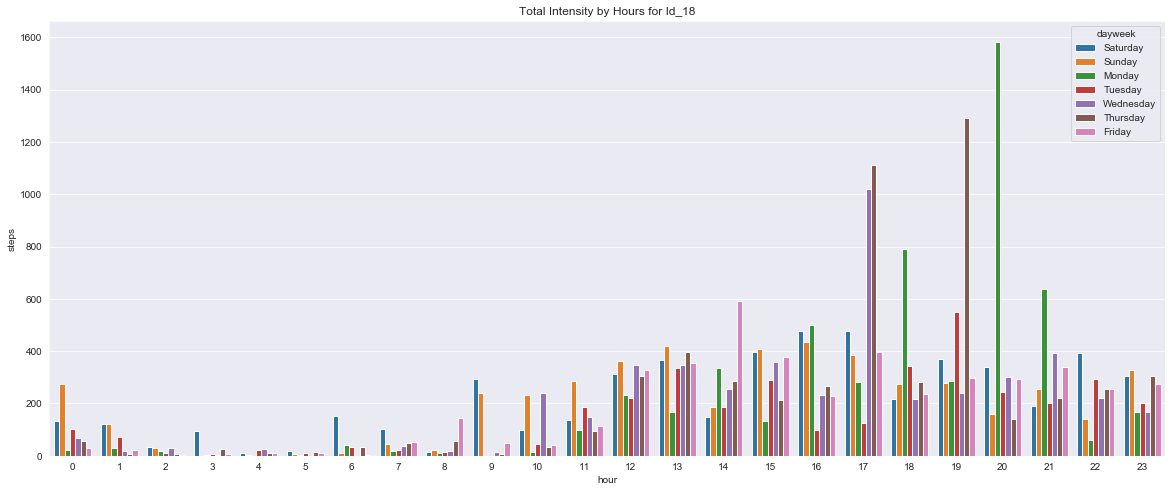

In [33]:
plt.figure(figsize=(20,8))
#plt.xlim(150,200)
#plt.yticks(range(40,141,10))
plt.title('Total Intensity by Hours for Id_18')

#sns.barplot(data=df_hr_id,x='hour',y='intensity_total',hue='dayweek',ci=None)
sns.barplot(data=df_hr_id,x='hour',y='steps',hue='dayweek',ci=None)